### load data

In [2]:
library(jsonlite)
library(mixOmics)
library(reshape2)
library(dplyr)
library(ggplot2)
library(reticulate)
glypy <- import('glypy')
setwd('C:/Users/benja/bpk Dropbox/Benjamin Kellman/working_dir/projects/GTspecificity/')


In [3]:
# load motifs
motif_vector = fromJSON(paste(readLines(motif_f<-'annotation/Unicarbkb_motif_vec_12259.json'), collapse=""))

Warning message in readLines(motif_f <- "annotation/Unicarbkb_motif_vec_12259.json"):
"incomplete final line found on 'annotation/Unicarbkb_motif_vec_12259.json'"


In [4]:
# load monosaccaride counts by motif
mofit_mono_f = 'annotation/Unicarbkb_motif_vec_12259.monosaccharides.csv'

if(file.exists(mofit_mono_f)){
    motif_ms_occurance = read.csv(mofit_mono_f)
}else{
    ms_comp=as.data.frame(do.call(rbind,lapply(1:length(motif_vector),function(i) cbind(motif=paste0('X',i-1),ms=unlist(lapply(glypy$io$glycoct$loads(motif_vector[i])$index,glypy$io$iupac$dumps))))))
    motif_ms_occurance=with(ms_comp,table(motif,ms))
    write.csv(motif_ms_occurance,file=mofit_mono_f)
}

In [5]:
load(file='annotation/03_protein_site_stats/glyco_stats.rda')

### General Trends: Protein structure aggregation

In [6]:

ms_tmp=motif_ms_occurance[,c(1,which(!grepl('^X',colnames(motif_ms_occurance))))]
colnames(ms_tmp)[1] = 'motif'

head(ms_tmp)

tmp = out
or_tmp = dcast(motif~measure+tool,value.var="coef",
               data=tmp[p.adjust(tmp$Pr_w,'fdr')<.1&tmp$sequon=='ASN'&
                        abs(log10(tmp$coef))<50&abs(log10(tmp$coef))>.1 &
                        #tmp$type=='struct'&
                       grepl('aa|ss',tmp$tool),],fill=1)

head(or_tmp)

XY=na.omit(unique(merge(ms_tmp,or_tmp,by='motif'))) ### motifs not substructures
if(any(!is.finite(unlist(XY)))){stop("non-finite values")}
Y = (data.matrix(XY[,colnames(ms_tmp)[-1][colSums(abs(ms_tmp[,-1]))>1e3 & apply(ms_tmp[,-1],2,sd)>1e-1]]))
X = (log(data.matrix(XY[,colnames(or_tmp)[-1][apply(or_tmp[,-1],2,sd)>1e-2]])))


cr = cor(X[,apply(X,2,sd)>1e-2],Y[,apply(Y,2,sd)>1e-2],method='spearman')
cr = cr[rowMeans(abs(cr))>.1,colMeans(abs(cr))>0]

pdf('figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/spearman_cor.cr_thresh.1.pdf')
heatmap.2(cr,trace='none',col=colorspace::diverging_hsv(101,power=.8),mar=c(10,10)) #color.jet(200))
dev.off()
heatmap.2(cr,trace='none',col=colorspace::diverging_hsv(101,power=.8),mar=c(10,10)) #color.jet(200))

write.csv(cr,'figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/spearman_cor.cr_thresh.1.csv')



,motif,a.D.Galp,a.D.Galp2NAc,a.D.Glcp,a.D.Glcp2NAc,a.D.Manp,a.D.Neup5Ac,a.D.Neup5Gc,a.L.Fucp,b.D.6.a.Glcp3S,...,b.D.Galp2NAc,b.D.Galp2NAc.4S.,b.D.Galp3S,b.D.Galp4S,b.D.Galp6S,b.D.Glcp2NAc,b.D.Glcp2NAc.6S.,b.D.GlcpS.2NAc.,b.D.Manp,b.D.Xylf
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,X0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,X1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,X10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,X100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,X1000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,X10000,0,0,0,0,2,2,0,0,0,...,0,0,0,0,0,6,0,0,1,0


,motif,A_aa,A_aaAll,A_aaDown,A_aaUp,ASA_dssp,C_aa,C_aaAll,C_aaDown,C_aaUp,...,T_aaDown,T_aaUp,V_aa,V_aaAll,V_aaDown,V_aaUp,W_aa,W_aaAll,W_aaDown,W_aaUp
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,X104,1.000,1,1.34,1.000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,X10427,1.000,1,1.00,1.000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,X10462,0.640,1,1.00,0.793,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,X10463,0.640,1,1.00,0.793,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,X10465,0.640,1,1.00,0.793,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,X10469,0.641,1,1.00,0.793,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


ERROR: Error in eval(expr, envir, enclos): non-finite values


motif,a.D.Galp,a.D.Galp2NAc,a.D.Glcp,a.D.Glcp2NAc,a.D.Manp,a.D.Neup5Ac,a.D.Neup5Gc,a.L.Fucp,b.D.6.a.Glcp3S,⋯,b.D.Galp2NAc,b.D.Galp2NAc.4S.,b.D.Galp3S,b.D.Galp4S,b.D.Galp6S,b.D.Glcp2NAc,b.D.Glcp2NAc.6S.,b.D.GlcpS.2NAc.,b.D.Manp,b.D.Xylf
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
X0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
X1,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
X10,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
X100,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
X1000,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
X10000,0,0,0,0,2,2,0,0,0,⋯,0,0,0,0,0,6,0,0,1,0


motif,A_aa,A_aaAll,A_aaDown,A_aaUp,ASA_dssp,C_aa,C_aaAll,C_aaDown,C_aaUp,⋯,T_aaDown,T_aaUp,V_aa,V_aaAll,V_aaDown,V_aaUp,W_aa,W_aaAll,W_aaDown,W_aaUp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X104,1.000,1,1.34,1.000,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X10427,1.000,1,1.00,1.000,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X10462,0.640,1,1.00,0.793,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X10463,0.640,1,1.00,0.793,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X10465,0.640,1,1.00,0.793,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X10469,0.641,1,1.00,0.793,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


png 
  2

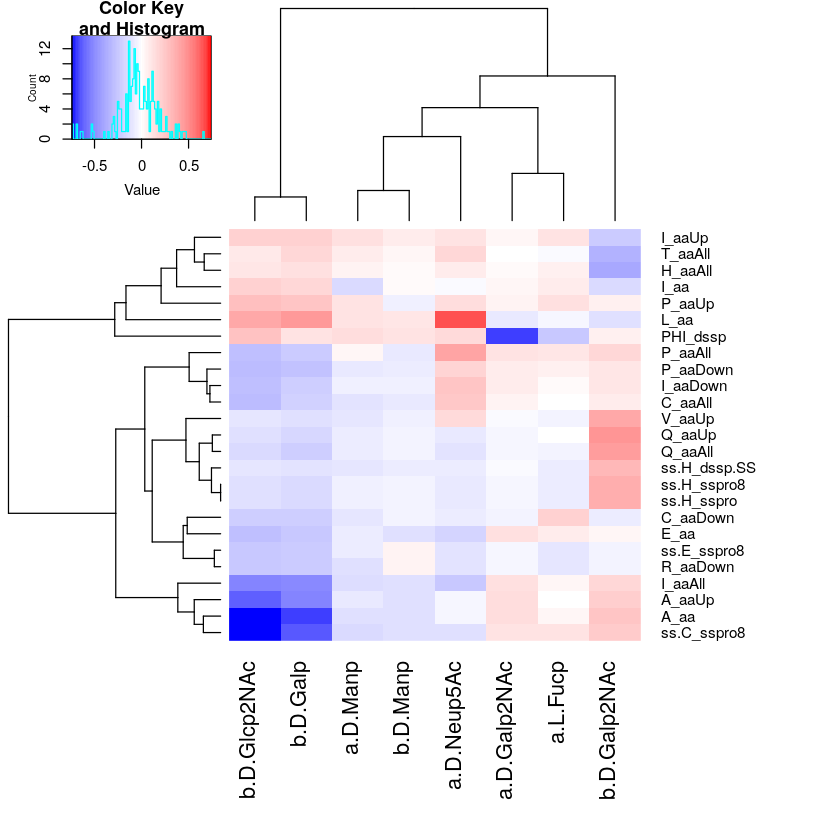

In [78]:
library(mixOmics)

# ms_tmp<-dcast(X~ms,data=as.data.frame(motif_ms_occurance))
# colnames(ms_tmp) = gsub('\\?|-','',colnames(ms_tmp))
ms_tmp=motif_ms_occurance[,c(1,which(!grepl('^X',colnames(motif_ms_occurance))))]
colnames(ms_tmp)[1] = 'motif'

head(ms_tmp)
#head(ms_tmp)
#dim(out)
#tmp = merge(out,ms_tmp,by='motif')
#dim(tmp)
#head(tmp)
#colnames(ms_tmp)

### change number of protein features
#### change number of components

tmp = out
or_tmp = dcast(motif~measure+tool,value.var="coef",
               data=tmp[p.adjust(tmp$Pr_w,'fdr')<.1&tmp$sequon=='ASN'&
                        abs(log10(tmp$coef))<50&abs(log10(tmp$coef))>.1 &
                        #tmp$type=='struct'&
                       grepl('aa|ss',tmp$tool),],fill=1)
                                                           #tmp$tool%in%c('aa','SS'),],fill=1)
                                                            #tmp$type=='struct',],fill=1)
                                                           #!tmp$tool%in%c('aaAll','aaUp','aaDown'),],fill = 1)
head(or_tmp)

XY=na.omit(unique(merge(ms_tmp,or_tmp,by='motif'))) ### motifs not substructures
if(any(!is.finite(unlist(XY)))){stop("non-finite values")}
Y = (data.matrix(XY[,colnames(ms_tmp)[-1][colSums(abs(ms_tmp[,-1]))>1e3 & apply(ms_tmp[,-1],2,sd)>1e-1]]))
X = (log(data.matrix(XY[,colnames(or_tmp)[-1][apply(or_tmp[,-1],2,sd)>1e-2]])))


cr = cor(X[,apply(X,2,sd)>1e-2],Y[,apply(Y,2,sd)>1e-2],method='spearman')
cr = cr[rowMeans(abs(cr))>.1,colMeans(abs(cr))>0]

pdf('figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/spearman_cor.cr_thresh.1.pdf')
heatmap.2(cr,trace='none',col=colorspace::diverging_hsv(101,power=.8),mar=c(10,10)) #color.jet(200))
dev.off()
heatmap.2(cr,trace='none',col=colorspace::diverging_hsv(101,power=.8),mar=c(10,10)) #color.jet(200))

write.csv(cr,'figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/spearman_cor.cr_thresh.1.csv')

# result <- pls(X, Y, ncomp = 20,scale=T)  # where ncomp is the number of dimensions/components to choose

# tune.pls <- perf(result, validation = 'Mfold', criterion = 'all', progressBar = F,folds = 10,nrepeat = 20)
# g=ggplot(melt(tune.pls[1:2]),aes(y=value,x=as.numeric(gsub(' comp','',Var2)),color=Var1,group=Var1))+
#     geom_line(size=2)+facet_wrap(L1~.)+theme_bw(base_size=15)#+theme(legend.position="none")

# g
# #dir.create('figures/03.statistical_trends/glycan_protein_assc/PLS.MS_v_protein/')
# ggsave(g,filename=paste0('figures/03.statistical_trends/glycan_protein_assc/PLS.MS_v_protein/PLS_error.pdf'))


# result <- pls(X, Y, ncomp = 10,scale=T)  # where ncomp is the number of dimensions/components to choose
# write.csv(result$mat.c,file=paste0('figures/03.statistical_trends/glycan_protein_assc/PLS.MS_v_protein/PLS_cors.csv'))

# cim(result,mar=c(10,10),threshold = .2 ) #,color =colorspace::diverging_hsv(101,power=.7)) #color.jet(200))

# pdf(paste0('figures/03.statistical_trends/glycan_protein_assc/PLS.MS_v_protein/heatmap.pdf'),
#     height=10,width=8)
# cim(result,mar=c(10,10),threshold = .2 ) #,color =colorspace::diverging_hsv(101,power=.7)) #color.jet(200))
# #try(network(result,cutoff = .2))
# dev.off()
# #try(network(result,cutoff = .2))


motif,coef,CI_95,Pr_w,N_obs,N_clust,MarginalR2,MarginalEntropy,df,ShapiroWilksP,⋯,b.D.Galp2NAc,b.D.Galp2NAc.4S.,b.D.Galp3S,b.D.Galp4S,b.D.Galp6S,b.D.Glcp2NAc,b.D.Glcp2NAc.6S.,b.D.GlcpS.2NAc.,b.D.Manp,b.D.Xylf
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
X0,1.010,(0.954 - 1.06),0.798,1725,72,1,0.492,1723,NA,⋯,0,0,0,0,0,0,0,0,0,0
X0,0.930,(0.829 - 1.03),0.191,1725,72,1,0.492,1723,NA,⋯,0,0,0,0,0,0,0,0,0,0
X0,1.030,(0.999 - 1.06),0.054,1725,72,1,0.492,1723,NA,⋯,0,0,0,0,0,0,0,0,0,0
X0,0.960,(0.906 - 1.01),0.155,1725,72,1,0.492,1723,NA,⋯,0,0,0,0,0,0,0,0,0,0
X0,1.000,(0.956 - 1.04),0.988,1725,72,1,0.492,1723,NA,⋯,0,0,0,0,0,0,0,0,0,0
X0,0.987,(0.942 - 1.03),0.576,1725,72,1,0.492,1723,NA,⋯,0,0,0,0,0,0,0,0,0,0


[1] "X..D.Galp"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 512 rows containing missing values (geom_image).”

[1] "X..D.Galp2NAc"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 303 rows containing missing values (geom_image).”

[1] "X..D.Glcp"
[1] "X..D.Glcp2NAc"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 594 rows containing missing values (geom_image).”

[1] "X..D.Manp"
[1] "X..D.Neup5NAc"
[1] "X..D.Xylf"
[1] "X..L.Fucp"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 575 rows containing missing values (geom_image).”

[1] "a.D.Galp"
[1] "a.D.Galp2NAc"
[1] "a.D.Glcp"
[1] "a.D.Glcp2NAc"
[1] "a.D.Manp"
Error in .subset2(x, i, exact = exact) : subscript out of bounds
[1] "a.D.Neup5Ac"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1035 rows containing missing values (geom_image).”

[1] "a.D.Neup5Gc"
[1] "a.L.Fucp"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 361 rows containing missing values (geom_image).”

[1] "b.D.6.a.Glcp3S"
[1] "b.D.Galp"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1653 rows containing missing values (geom_image).”

[1] "b.D.Galp2NAc"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1061 rows containing missing values (geom_image).”

[1] "b.D.Galp2NAc.4S."


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 248 rows containing missing values (geom_image).”

[1] "b.D.Galp3S"
[1] "b.D.Galp4S"
[1] "b.D.Galp6S"
[1] "b.D.Glcp2NAc"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1596 rows containing missing values (geom_image).”

[1] "b.D.Glcp2NAc.6S."
[1] "b.D.GlcpS.2NAc."
[1] "b.D.Manp"


Saving 6.67 x 6.67 in image
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 921 rows containing missing values (geom_image).”

[1] "b.D.Xylf"


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1596 rows containing missing values (geom_image).”`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1653 rows containing missing values (geom_image).”

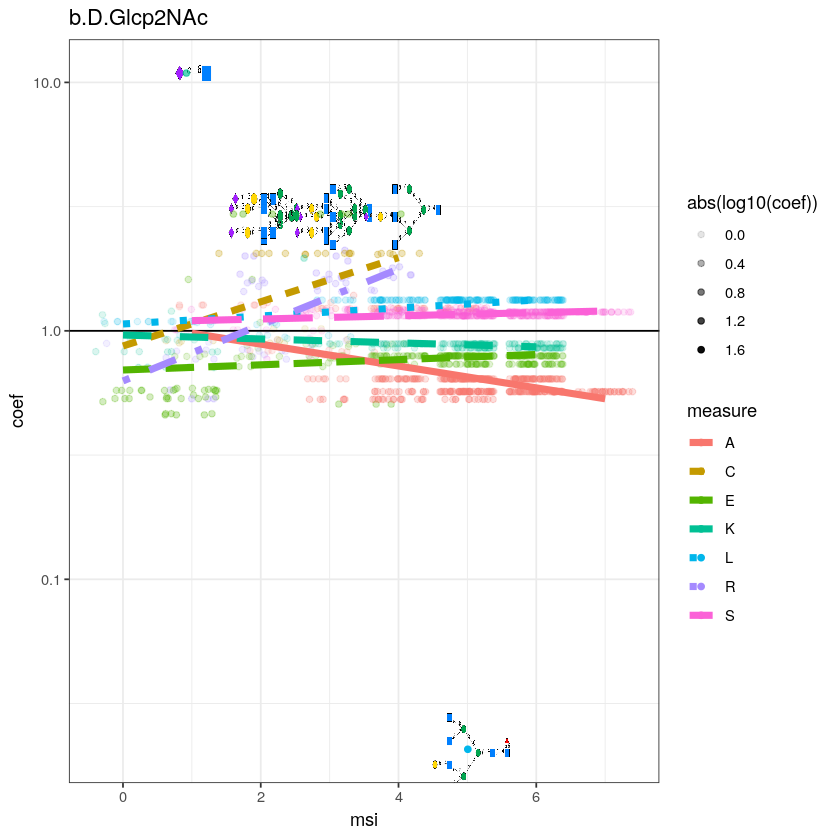

[1] NA

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 921 rows containing missing values (geom_image).”

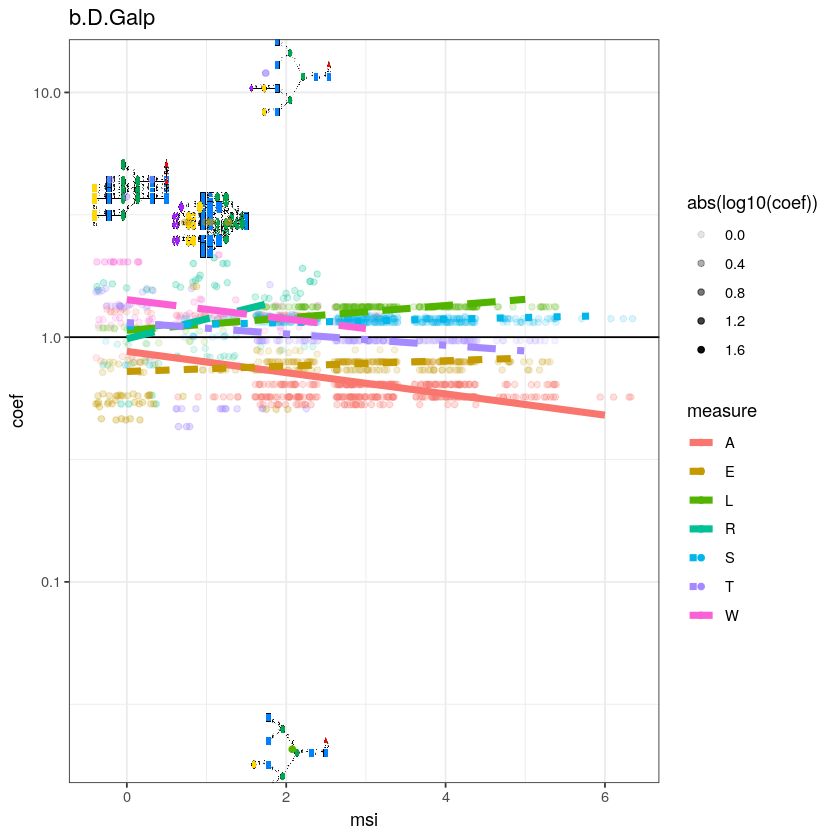

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 361 rows containing missing values (geom_image).”

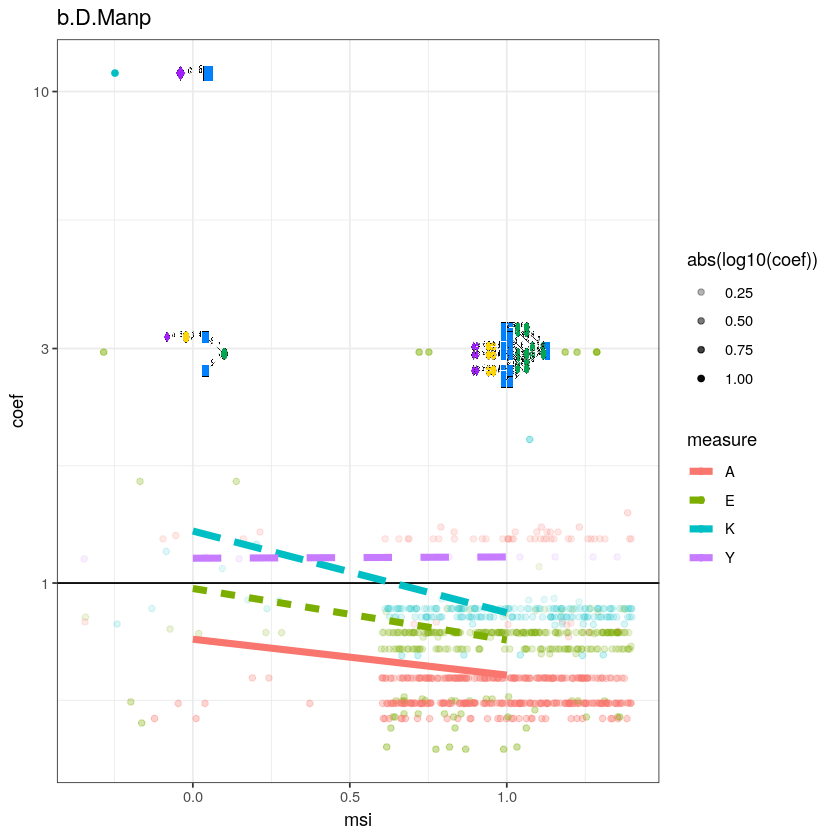

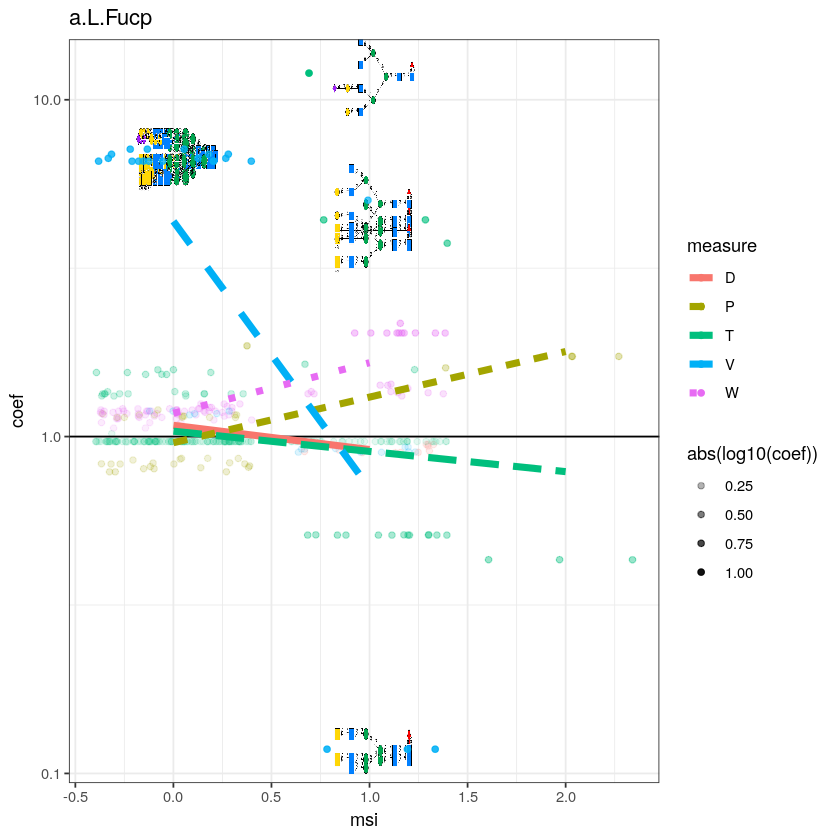

In [453]:
library(ggimage)
# tmp_i$image = ifelse(abs(log(tmp_i$coef))>1,
#      paste0("annotation/motifPNG/motif",as.numeric(gsub('X','',tmp_i$motif))+1,".png"),NA)
# geom_image(aes(image=image),size=.25,alpha=1)+

# ms_tmp<-dcast(motif~ms,data=as.data.frame(motif_ms_occurance))
# colnames(ms_tmp) = gsub('\\?|-','',colnames(ms_tmp))
ms_tmp=motif_ms_occurance
colnames(ms_tmp)[1] = 'motif'

#head(ms_tmp)
#dim(out)
tmp = merge(out,ms_tmp,by='motif')
#dim(tmp)
head(tmp)
#colnames(ms_tmp)

or_tmp = dcast(motif~measure,value.var="coef",data=tmp[tmp$tool%in%c('aa')&tmp$type=='struct'&p.adjust(tmp$Pr_w,'fdr')<.1&abs(log10(tmp$coef))<50,])


#gridExtra::grid.arrange(grobs=
l=lapply(colnames(ms_tmp)[-1],function(msi){
    print(msi)
    tmp$msi = tmp[[msi]]
#     tmp_i = droplevels(tmp[tmp$tool%in%c('aa')&tmp$type=='struct'&p.adjust(tmp$Pr_w,'fdr')<.1&abs(log10(tmp$coef))<50,])
    
#     tmp2 = tmp_i %>% group_by(measure) %>% summarize(aov_p=summary(aov(log(coef)~msi))[[1]][[5]][1])
#     tmp_i = tmp_i[tmp_i$measure %in% tmp2$measure[tmp2$aov_p<.001],]
    #print(unique(tmp_i[,c('aov_p','measure')]))
    tmp_i = droplevels(tmp[tmp$tool%in%c('aa')&tmp$type=='struct'&
                           p.adjust(tmp$Pr_w,'fdr')<.1&abs(log10(tmp$coef))<50,])
    tmp2=NULL
    try(tmp2 <-tmp_i %>% group_by(measure) %>% summarize(aov_p=summary(aov(log(coef)~msi))[[1]][[5]][1]))
    if(is.null(tmp2)){return(NA)}
    tmp_i = droplevels(tmp_i[tmp_i$measure %in% na.omit(tmp2$measure[p.adjust(tmp2$aov_p,'fdr')<.1]),])
    if(prod(dim(tmp_i))==0){return(NA)}
    tmp_i$image = ifelse(abs(log(tmp_i$coef))>1,
                         paste0("annotation/motifPNG/motif",as.numeric(gsub('X','',tmp_i$motif))+1,".png"),NA)

    # convert to log10
    tmp_i$coef = 10^(log(tmp_i$coef)/log(10))
    
    tmp_i = droplevels(tmp_i)
    
    lin_mods = do.call(rbind,lapply(unique(tmp_i$measure),function(x){
        cbind(coef(summary(glm(log10(coef) ~ msi,data=tmp_i[tmp_i$measure==x,]))),x,msi)
    }))
    
    g=ggplot(tmp_i,aes(x=msi,y=coef,fill=measure))+
        #geom_boxplot()+
        geom_image(aes(image=image),size=.25)+
        geom_jitter(aes(color=measure,alpha=abs(log10(coef))))+geom_hline(yintercept = 1)+
        stat_smooth(aes(lty=measure,color=measure),size=2,method='glm',se = F)+
        scale_y_log10()+
        ggtitle(msi)+theme_bw()#+ theme(legend.position="none")
    ggsave(g,filename = paste0('figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/',msi,'.pdf'))
    write.csv(lin_mods,file = paste0('figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/',msi,'.regression_stats.csv'))
    write.csv(tmp_i,file = paste0('figures/03.statistical_trends/glycan_protein_assc/protein_monosaccharide_trends/',msi,'.csv'))
    return(g)
    })
#}))
names(l) = colnames(ms_tmp)[-1]

#g_legend<-function(a.gplot){
#    tmp <- ggplot_gtable(ggplot_build(a.gplot)); leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box"); legend <- tmp$grobs[[leg]]; return(legend)}
#leg = g_legend(l[[1]])

#l[[6]]

l[[names(rev(sort(colSums(ms_tmp[,-1]))))[1]]]
l[[names(rev(sort(colSums(ms_tmp[,-1]))))[2]]]
l[[names(rev(sort(colSums(ms_tmp[,-1]))))[3]]]
l[[names(rev(sort(colSums(ms_tmp[,-1]))))[4]]]
l[[names(rev(sort(colSums(ms_tmp[,-1]))))[5]]]


# ggplot(droplevels(tmp[tmp$tool%in%c('aa')&tmp$type=='struct'&p.adjust(tmp$Pr_w,'fdr')<.1&abs(log10(tmp$coef))<50,]),
#        aes(y=coef)))+
    
# #    geom_boxplot(aes())+
#     scale_y_log10()+facet_wrap(~measure)

In [ ]:
library("ggplot2")
library("ggimage")

pca = prcomp(log(data.matrix(tmp2[,-1])))

rot=data.frame(pca$rotation)
rot$aa=rownames(rot)
x=data.frame(pca$x)
x$motifs = rownames(x)
#head(tmp3<-merge(rot,x))

x$image = sapply(x$motifs,function(m){
    paste0("annotation/motifPNG/motif",as.numeric(gsub('X','',m))+1,".png")
})

library(ggrepel)

g=ggplot(x,aes(x=PC1,y=PC2))+
    geom_image(aes(image=image),size=.05,position = position_jitter(width = .1,height=.1))+
    geom_segment( aes(x = 0, y = 0, xend = PC1, yend = PC2),
                 data = rot,arrow = arrow(length = unit(0.01, "npc")))+
    geom_text_repel(data=rot,aes(label=aa))+theme_classic()

g